# IEOR 4523 - 2K RATING PROJECT #

<h1>Project Description<h1>


Contributed by:
    
<li>Zheyuan Hu
<li>Shihao Peng
<li>Suyang Song
<li>Yang Rong  

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_regression,f_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Preprocessing #

In [2]:
#Import data from CSV files
#df_19_20_reg = pd.read_csv('nba_data/2019-2020/merged2019-2020regular.csv')
#df_19_20_off = pd.read_csv('nba_data/2019-2020/merged2019-2020playoff.csv')
df_19_20_reg = pd.read_csv('nba-data/2019-2020/merged2019-2020regular.csv')
df_19_20_off = pd.read_csv('nba-data/2019-2020/merged2019-2020playoff.csv')
df_19_20_reg.head()

,Unnamed: 0,Unnamed: 0.1,#,Player,Team,GP,MPG,FGM,FGA,FG%,...,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG,Rating
0,0,NaN,1,James Harden,HOU,68,36.5,9.9,22.3,0.444,...,4.5,3.3,1.0,5.5,6.6,7.5,1.8,0.9,34.3,96
1,1,NaN,2,Bradley Beal,WAS,57,36.0,10.4,22.9,0.455,...,3.4,2.2,0.9,3.3,4.2,6.1,1.2,0.4,30.5,88
2,2,NaN,3,Damian Lillard,POR,66,37.5,9.5,20.4,0.463,...,2.9,1.7,0.5,3.8,4.3,8.0,1.1,0.3,30.0,94
3,3,NaN,4,Trae Young,ATL,60,35.3,9.1,20.8,0.437,...,4.8,1.7,0.5,3.7,4.2,9.3,1.1,0.1,29.6,88
4,4,NaN,5,Giannis Antetokounmpo,MIL,63,30.4,10.9,19.7,0.553,...,3.7,3.1,2.2,11.4,13.6,5.6,1.0,1.0,29.5,97


In [3]:
#Check missing values
missing_values_count = df_19_20_reg.isnull().sum()
missing_values_count

Unnamed: 0        0
Unnamed: 0.1    249
#                 0
Player            0
Team              0
GP                0
MPG               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
TOV               0
PF                0
ORB               0
DRB               0
RPG               0
APG               0
SPG               0
BPG               0
PPG               0
Rating            0
dtype: int64

In [4]:
#drop columns with missing value
df_19_20_reg_d = df_19_20_reg.drop(['Unnamed: 0','#','Unnamed: 0.1'],axis = 1).copy()
df_19_20_off_d = df_19_20_off.drop(['Unnamed: 0','#','Unnamed: 0.1'],axis = 1).copy()
print(df_19_20_reg_d.head())
print(df_19_20_off_d.head())

                  Player Team  GP   MPG   FGM   FGA    FG%  3PM   3PA    3P%  \
0           James Harden  HOU  68  36.5   9.9  22.3  0.444  4.4  12.4  0.355   
1           Bradley Beal  WAS  57  36.0  10.4  22.9  0.455  3.0   8.4  0.353   
2         Damian Lillard  POR  66  37.5   9.5  20.4  0.463  4.1  10.2  0.401   
3             Trae Young  ATL  60  35.3   9.1  20.8  0.437  3.4   9.5  0.361   
4  Giannis Antetokounmpo  MIL  63  30.4  10.9  19.7  0.553  1.4   4.7  0.304   

   ...  TOV   PF  ORB   DRB   RPG  APG  SPG  BPG   PPG  Rating  
0  ...  4.5  3.3  1.0   5.5   6.6  7.5  1.8  0.9  34.3      96  
1  ...  3.4  2.2  0.9   3.3   4.2  6.1  1.2  0.4  30.5      88  
2  ...  2.9  1.7  0.5   3.8   4.3  8.0  1.1  0.3  30.0      94  
3  ...  4.8  1.7  0.5   3.7   4.2  9.3  1.1  0.1  29.6      88  
4  ...  3.7  3.1  2.2  11.4  13.6  5.6  1.0  1.0  29.5      97  

[5 rows x 23 columns]
             Player Team  GP   MPG   FGM   FGA    FG%  3PM  3PA    3P%  ...  \
0  Donovan Mitchell  UTA   

In [5]:
#combine data from regular season and off season, groupby them by player name and team name
#calculate means for each feature

df_combined = pd.concat([df_19_20_off_d,df_19_20_reg_d])
by_player = df_combined.groupby(['Player','Team'])
df_means = by_player.mean()
df_means

,,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG,Rating
Player,Team,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,ORL,62.0,32.50,5.40,12.40,0.4370,1.20,3.80,0.3080,2.40,3.60,...,1.60,2.00,1.70,5.90,7.70,3.70,0.80,0.60,14.40,80.0
Aaron Holiday,IND,35.0,21.25,3.25,6.85,0.4925,1.15,2.75,0.4190,0.95,1.25,...,1.15,2.15,0.25,1.50,1.80,2.95,0.90,0.10,8.65,76.0
Abdel Nader,OKC,55.0,15.80,2.20,4.80,0.4680,0.90,2.30,0.3750,0.90,1.20,...,0.80,1.40,0.30,1.60,1.80,0.70,0.40,0.40,6.30,71.0
Al Horford,PHI,35.5,31.15,3.90,8.40,0.4650,0.75,2.60,0.1750,0.95,1.50,...,1.00,2.80,1.85,5.15,7.00,3.10,0.50,1.05,9.45,80.0
Al-Farouq Aminu,ORL,18.0,21.10,1.40,4.80,0.2910,0.50,2.00,0.2500,1.10,1.60,...,0.90,1.50,1.30,3.50,4.80,1.20,1.00,0.40,4.30,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wesley Iwundu,ORL,28.5,16.75,1.55,4.25,0.3580,0.65,1.50,0.4560,1.25,1.75,...,0.55,1.25,0.35,2.05,2.35,1.00,0.55,0.30,5.00,72.0
Wesley Matthews,MIL,38.5,24.50,2.45,6.00,0.4085,1.65,4.35,0.3795,0.75,1.00,...,0.65,1.75,0.45,1.65,2.15,1.15,0.75,0.25,7.30,75.0
Will Barton,DEN,58.0,33.00,5.70,12.70,0.4500,1.90,5.00,0.3750,1.80,2.30,...,1.50,2.10,1.30,5.00,6.30,3.70,1.10,0.50,15.10,79.0


In [6]:
#g = sns.PairGrid(df_means)
#g.map_lower(sns.scatterplot)
#g.map_diag(sns.kdeplot)

In [7]:
#PCA
X_std = StandardScaler().fit_transform(df_means) # standardize
pca = PCA()
pca.fit(X_std) # Apply PCA for all components

PCA()

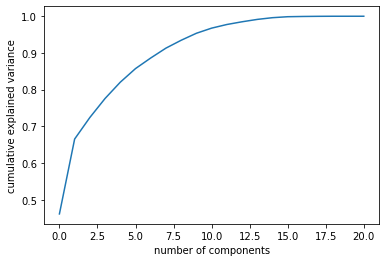

In [8]:
# plot cumulative explained variance ratio as function of # of compoents
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [9]:
# pca with 15 components(cover about 90% var)
pca = PCA(n_components=15)
pca15 = pca.fit(X_std)
pd.DataFrame(pca15.transform(X_std))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.778810,1.034432,-0.513942,-0.454321,-0.533640,0.193183,1.456826,-0.284857,-0.020377,0.158928,0.142183,0.281062,0.166272,-0.628227,-0.065525
1,-1.746864,-1.170815,0.067179,0.871909,0.266091,0.911565,-1.141151,-0.089553,-0.521227,0.022942,-0.046308,0.000853,0.090982,0.002536,-0.052216
2,-3.457731,-0.710544,-0.630958,-0.664615,0.454154,0.099326,-0.329890,0.174763,0.390711,-0.121023,0.021764,-0.109220,0.054979,0.236007,0.491693
3,0.095401,2.419195,1.129363,0.532532,-0.475246,-0.763422,0.532145,0.402075,-0.261922,0.022058,1.150014,0.325974,0.187045,-0.624661,-0.543543
4,-2.413105,0.231057,0.796502,2.122536,-0.302339,-0.788533,1.342259,-1.359264,1.260311,-0.517212,-0.265006,0.447746,-0.119162,0.098208,-0.228654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,-3.503270,-1.050412,0.263198,0.633936,0.830377,0.239520,0.125614,-1.308276,1.325334,-0.107017,-0.001819,0.306185,0.184981,-0.083726,0.194262
263,-2.237971,-1.551855,0.717468,0.241350,0.051292,0.122630,0.139271,0.111431,0.102858,-0.394902,-0.269665,0.203293,-0.169703,-0.358206,-0.115268
264,1.728918,-0.329530,0.093290,-0.644255,-0.906104,0.436958,0.752396,-0.207548,-0.590382,-0.404080,-0.018761,0.281907,0.053704,-0.327024,-0.087983
265,-1.852898,3.805829,-0.648315,0.817806,-0.779329,-0.637596,0.066665,1.495860,-0.428912,-1.056441,-0.048759,-0.302471,0.482086,0.094053,-0.095049


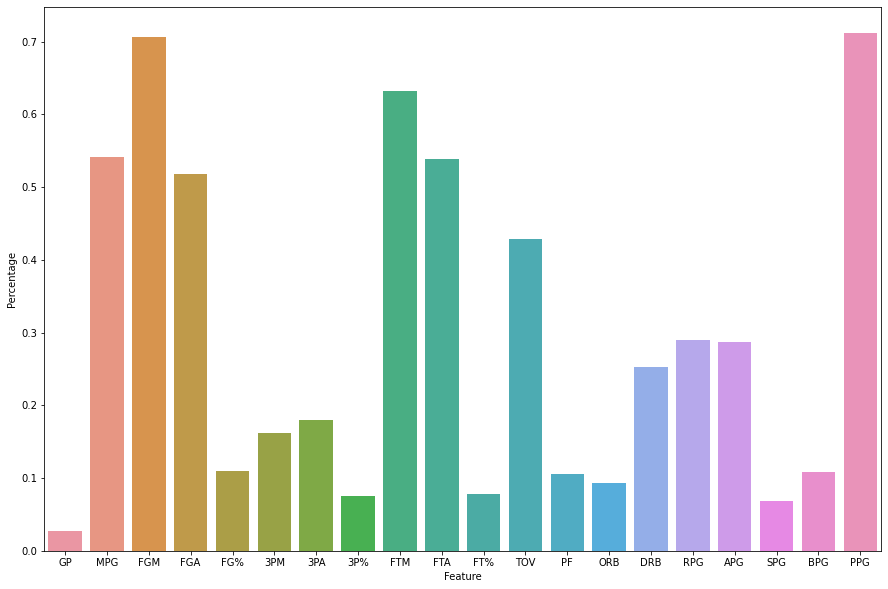

In [10]:
#Apply mutual_info_regression to calculate the dependency of each feature to the rating
x = df_means.drop('Rating', axis = 1).copy()
y = df_means['Rating']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

mutual = mutual_info_regression(x, y)
feature = list(df_means.columns)[:-1]
df_mutual = pd.DataFrame({'Feature': feature, 'Percentage': mutual})
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot (ax = ax, x = "Feature", y = "Percentage", data = df_mutual)

In [11]:
drop_index = df_mutual.loc[df_mutual['Percentage'] < 0.1]
drop_feature = drop_index['Feature']
print('Drop feature with dependency smaller than 10%: ')
print(list(drop_feature))

df = df_means.drop(columns = drop_feature,axis = 1)

Drop feature with dependency smaller than 10%: 
['GP', '3P%', 'FT%', 'ORB', 'SPG']


# Regression Modles

In [12]:
x = df.drop('Rating', axis = 1).copy()
y = df['Rating']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 0)

Linear Regression Confidence: 89.62%
Mean squared error: 2.83
R Square: 0.90


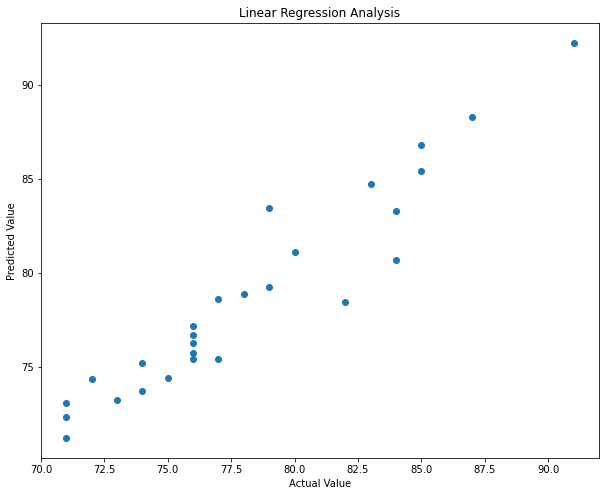

In [13]:
#Linear Regression
lreg = LinearRegression()
lreg.fit(x_train,y_train)

lreg_confidence = lreg.score(x_test,y_test)
print(f"Linear Regression Confidence: {round(lreg_confidence*100,2)}%")

y_pred_lreg = lreg.predict(x_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_lreg))
print('R Square: %.2f' % r2_score(y_test, y_pred_lreg))

plt.figure(figsize=(10, 8))
plt.scatter(y_test,y_pred_lreg)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Linear Regression Analysis')
plt.show()

In [17]:
lreg.coef_
#MPG FGM FGA FG% 3PM 3PA FTM FTA TOV PF DRB RPG APG BPG PPG

array([-0.05848896,  7.63633154, -0.70231103,  3.08786665,  2.2670389 ,
        0.45352134,  4.07961585, -0.17627836, -0.77070743,  0.02863786,
        0.71730472, -0.19515604,  0.73293872,  1.78390914, -2.65045671])

Logistic Regression Confidence: 7.41%
Mean squared error: 11.30
R Square: 0.59


C:\Users\joura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


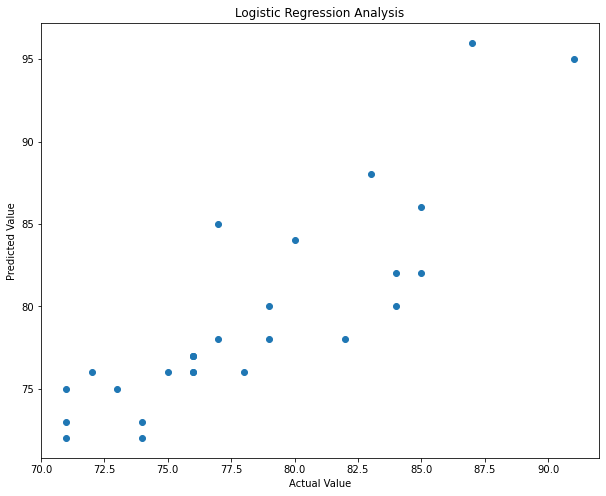

In [14]:
#Logistic Regression
log = LogisticRegression()
log.fit(x_train,y_train)

log_confidence = log.score(x_test,y_test)
print(f"Logistic Regression Confidence: {round(log_confidence*100,2)}%")

y_pred_log = log.predict(x_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_log))
print('R Square: %.2f' % r2_score(y_test, y_pred_log))

plt.figure(figsize=(10, 8))
plt.scatter(y_test,y_pred_log)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Logistic Regression Analysis')
plt.show()

In [23]:
#Neural Network

#Start hidden_layers with 22 nodes.
hidden_layers = (22,)
epochs=10000

clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(100,200,400,), max_iter = epochs, random_state=1)
clf.fit(x_train, y_train)

y_pred_clf = clf.predict(x_test)

correlation_matrix = np.corrcoef(y_pred_clf, y_test)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
mse1 = (np.square(y_test - predictions)).mean(axis=None)
print('R Square: %.2f' % r_squared)
print('MSE1 : %.2f' % mse1)

plt.figure(figsize=(10, 8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Neutral Network Analysis')
plt.show()

NameError: name 'predictions' is not defined

In [24]:
y_pred_clf == y_pred_log

array([ True,  True, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
        True,  True, False,  True, False,  True,  True,  True, False])

In [25]:
y_pred_clf == y_pred_lreg

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [26]:
y_pred_log == y_pred_lreg

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

# Plots

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

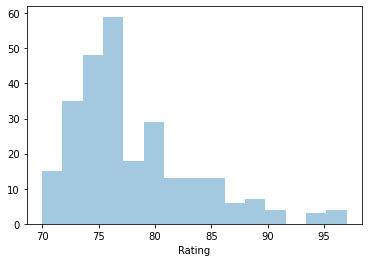

In [39]:
#Rating distribution histogram 
sns.distplot(df_means.Rating,kde=False)

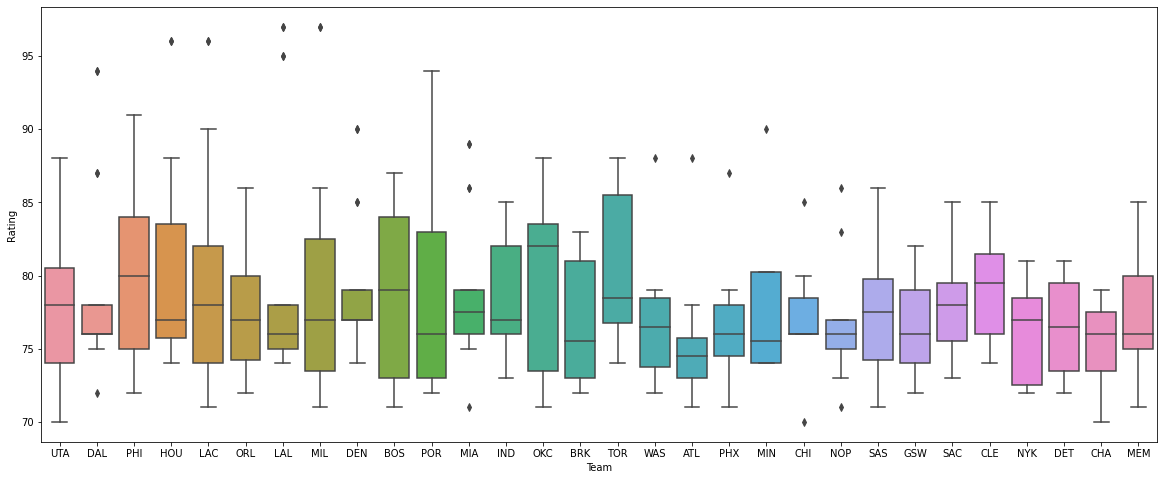

In [46]:
#Boxplot of player rating in each team
plt.figure(figsize=(20, 8))
sns.boxplot(x = 'Team', y = 'Rating',data=df_combined)

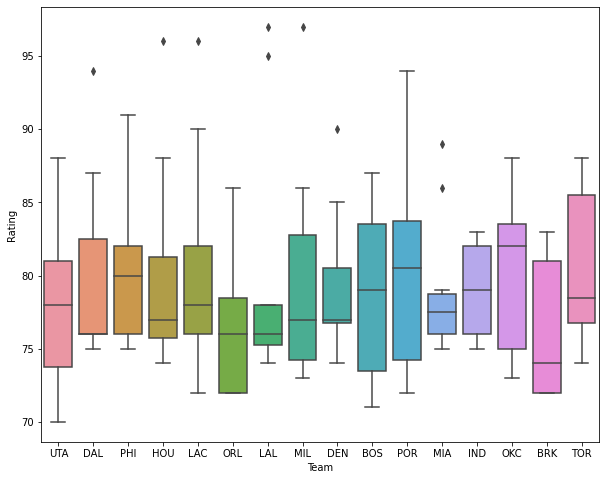

In [45]:
#Boxplot of player rating in teams which got into playoff
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Team', y = 'Rating',data=df_19_20_off)

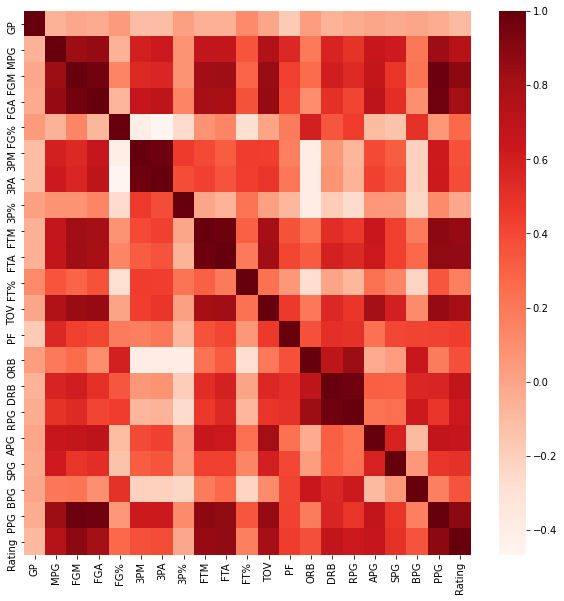

In [31]:
#Heatmap of correlation of player statistics 
plt.figure(figsize=(10, 10))
sns.heatmap(df_means.corr(), cmap='Reds')

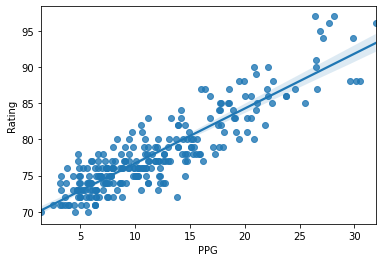

In [32]:
#Linear Regression model fit of Rating versus PPG
sns.regplot(x = 'PPG', y = 'Rating',data=df_means)

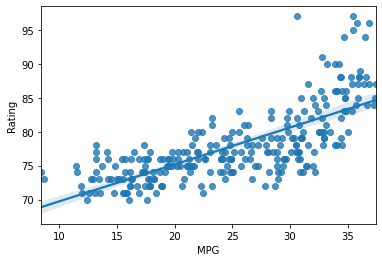

In [33]:
#Linear Regression model fit of Rating versus MPG
sns.regplot(x = 'MPG', y = 'Rating',data=df_means)

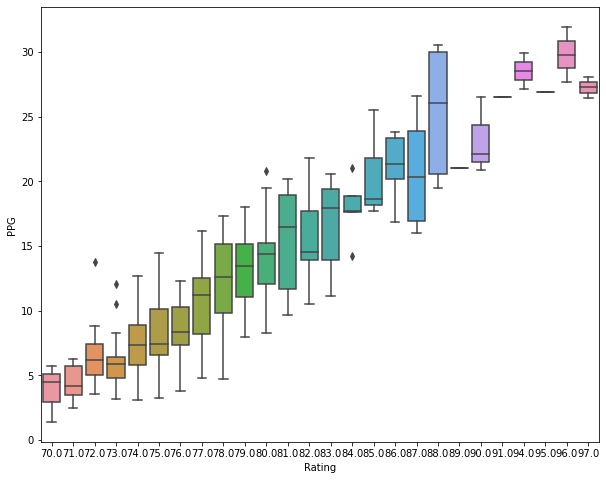

In [47]:
#Boxplot of corresponding PPG of each Rating
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Rating',y = 'PPG',data=df_means)

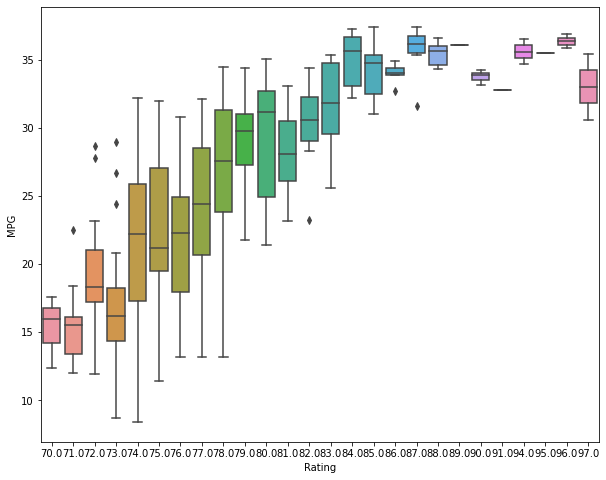

In [48]:
#Boxplot of corresponding MPG of each Rating
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Rating',y = 'MPG',data=df_means)